In [23]:
!pip install opencv-python
!pip install dlib
!pip install mtcnn

In [24]:
# conda install -c conda-forge opencv
# conda install -c menpo dlib
# conda install -c conda-forge mtcnn

In [25]:
import cv2
import matplotlib.pyplot as plt
import time
import os

cv2.__version__

'4.1.2'

In [26]:
img_file = 'test_2.jpg'

## opencv-haar //1

input image size: (5917, 803)
model output: [328 362  77  77]
model output: [ 171 1834   97   97]
model output: [ 567 1830   89   89]
model output: [ 403 2808   92   92]
model output: [ 492 2029  265  265]
model output: [ 399 3160   92   92]
model output: [ 290 3378   61   61]
model output: [ 193 3818  284  284]
model output: [ 393 4214   95   95]
model output: [ 287 4432   63   63]
model output: [ 400 4564   94   94]
model output: [ 409 4914   89   89]
model output: [ 288 5135   63   63]


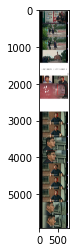

Seconds taken: 3.484


In [27]:
import cv2

classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

print(f'input image size: {img.shape[:2]}')

start = time.time()

faces = classifier.detectMultiScale(img)

for face in faces:
    print(f'model output: {face}')
    x, y, w, h = face
    # confidence?
    x1, y1 = x + w, y + h
    cv2.rectangle(img, (x, y), (x1, y1), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_haar_1.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
haar1 = end-start

## opencv-haar //2

input image size: (2958, 401)
model output: [279 912  50  50]
model output: [ 83 915  53  53]
model output: [ 199 1400   53   53]
model output: [ 271 1071   91   91]
model output: [ 242 1010  140  140]
model output: [ 145 1690   33   33]
model output: [ 198 1579   50   50]
model output: [  93 1904  150  150]
model output: [ 195 2106   50   50]
model output: [ 199 2280   52   52]
model output: [ 201 2455   51   51]


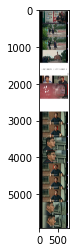

Seconds taken: 1.072


In [28]:
import cv2

classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_h, img_w = img.shape[:2]
img_resized = cv2.resize(img, (img_w//2, img_h//2))
print(f'input image size: {img_resized.shape[:2]}')

start = time.time()

faces = classifier.detectMultiScale(img_resized)

for face in faces:
    print(f'model output: {face}')
    x, y, w, h = face
    # confidence?
    x1, y1 = x + w, y + h
    cv2.rectangle(img, (x*2, y*2), (x1*2, y1*2), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_haar_2.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
haar2 = end-start

## opencv-haar //4

input image size: (1479, 200)
model output: [ 41 457  26  26]
model output: [140 456  26  26]
model output: [100 701  25  25]
model output: [122 507  67  67]
model output: [ 98 789  27  27]
model output: [  97 1053   25   25]
model output: [  98 1140   26   26]
model output: [ 47 954  69  69]
model output: [ 100 1227   26   26]


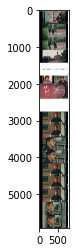

Seconds taken: 0.264


In [29]:
import cv2

classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_h, img_w = img.shape[:2]
img_resized = cv2.resize(img, (img_w//4, img_h//4))
print(f'input image size: {img_resized.shape[:2]}')

start = time.time()

faces = classifier.detectMultiScale(img_resized)

for face in faces:
    print(f'model output: {face}')
    x, y, w, h = face
    # confidence?
    x1, y1 = x + w, y + h
    cv2.rectangle(img, (x*4, y*4), (x1*4, y1*4), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_haar_4.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
haar4 = end-start

## dlib //1

Works on grayscale images

HOG(Histogram of Oriented Gradients) + Linear SVM

input image size: (5917, 803)
model output: [(175, 1848) (265, 1938)]
model output: [(563, 1828) (653, 1918)]
model output: [(404, 4575) (494, 4665)]
model output: [(394, 4217) (484, 4306)]
model output: [(403, 3174) (478, 3248)]
model output: [(411, 2825) (486, 2900)]
model output: [(419, 4932) (494, 5007)]
model output: [(324, 3875) (510, 4061)]
model output: [(455, 2025) (776, 2346)]
model output: [(291, 3486) (513, 3709)]


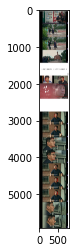

Seconds taken: 4.398


In [30]:
import dlib
import cv2

detector = dlib.get_frontal_face_detector()

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(f'input image size: {gray.shape[:2]}')

start = time.time()

faces = detector(gray, 1)

for face in faces:
    print(f'model output: {face}')
    x0 = face.left()
    y0 = face.top()
    x1 = face.right()
    y1 = face.bottom()
    # confidence?
    cv2.rectangle(img, (x0, y0), (x1, y1), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_dlib_1.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
dlib1 = end-start

## dlib //2

input image size: (2958, 401)
model output: [(88, 924) (132, 967)]
model output: [(280, 914) (323, 958)]
model output: [(199, 1582) (242, 1625)]
model output: [(204, 2287) (247, 2330)]
model output: [(194, 2110) (237, 2153)]
model output: [(204, 1409) (247, 1452)]
model output: [(209, 2466) (245, 2502)]
model output: [(151, 1919) (259, 2027)]
model output: [(236, 1010) (390, 1165)]
model output: [(151, 1740) (259, 1848)]


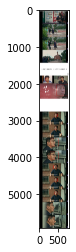

Seconds taken: 1.513


In [31]:
import dlib
import cv2

detector = dlib.get_frontal_face_detector()

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_h, gray_w = gray.shape[:2]
gray_resized = cv2.resize(gray, (gray_w//2, gray_h//2))
print(f'input image size: {gray_resized.shape[:2]}')

start = time.time()

faces = detector(gray_resized, 1)

for face in faces:
    print(f'model output: {face}')
    x0 = face.left()
    y0 = face.top()
    x1 = face.right()
    y1 = face.bottom()
    # confidence?
    cv2.rectangle(img, (x0*2, y0*2), (x1*2, y1*2), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_dlib_2.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
dlib2 = end-start

## dlib //4

input image size: (1479, 200)
model output: [(78, 965) (129, 1017)]
model output: [(72, 873) (124, 925)]
model output: [(113, 511) (187, 586)]


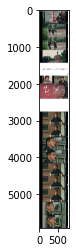

Seconds taken: 0.290


In [32]:
import dlib
import cv2

detector = dlib.get_frontal_face_detector()

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_h, gray_w = gray.shape[:2]
gray_resized = cv2.resize(gray, (gray_w//4, gray_h//4))
print(f'input image size: {gray_resized.shape[:2]}')

start = time.time()

faces = detector(gray_resized, 1)

for face in faces:
    print(f'model output: {face}')
    x0 = face.left()
    y0 = face.top()
    x1 = face.right()
    y1 = face.bottom()
    # confidence?
    cv2.rectangle(img, (x0*4, y0*4), (x1*4, y1*4), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_dlib_4.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
dlib4 = end-start

## MTCNN //1

input image size: (5917, 803)
model output: {'box': [415, 4567, 76, 95], 'confidence': 0.9999998807907104, 'keypoints': {'left_eye': (430, 4602), 'right_eye': (464, 4600), 'nose': (444, 4617), 'mouth_left': (433, 4639), 'mouth_right': (461, 4638)}}
model output: {'box': [407, 4216, 76, 92], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (421, 4252), 'right_eye': (455, 4248), 'nose': (436, 4267), 'mouth_left': (427, 4289), 'mouth_right': (456, 4285)}}
model output: {'box': [422, 4916, 72, 90], 'confidence': 0.9999995231628418, 'keypoints': {'left_eye': (437, 4950), 'right_eye': (471, 4950), 'nose': (450, 4965), 'mouth_left': (437, 4984), 'mouth_right': (467, 4985)}}
model output: {'box': [411, 3161, 77, 90], 'confidence': 0.9999994039535522, 'keypoints': {'left_eye': (426, 3198), 'right_eye': (461, 3193), 'nose': (441, 3212), 'mouth_left': (433, 3234), 'mouth_right': (460, 3229)}}
model output: {'box': [420, 2808, 72, 92], 'confidence': 0.9999969005584717, 'keypoints': {'le

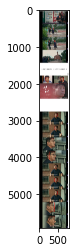

Seconds taken: 9.122


In [33]:
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

print(f'input image size: {img.shape[:2]}')

start = time.time()

faces = detector.detect_faces(img)

for face in faces:
    print(f'model output: {face}')
    x, y, w, h = face['box']
    x1, y1 = x + w, y + h
    # confidence?
    cv2.rectangle(img, (x, y), (x1, y1), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_mtcnn_1.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
mtcnn1 = end-start

## MTCNN //2

input image size: (2958, 401)
model output: {'box': [202, 2108, 39, 45], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (210, 2125), 'right_eye': (227, 2123), 'nose': (217, 2133), 'mouth_left': (213, 2144), 'mouth_right': (227, 2142)}}
model output: {'box': [207, 2283, 38, 48], 'confidence': 0.9999991655349731, 'keypoints': {'left_eye': (214, 2300), 'right_eye': (231, 2299), 'nose': (222, 2309), 'mouth_left': (216, 2319), 'mouth_right': (230, 2318)}}
model output: {'box': [208, 1403, 37, 45], 'confidence': 0.9999984502792358, 'keypoints': {'left_eye': (215, 1421), 'right_eye': (232, 1419), 'nose': (222, 1428), 'mouth_left': (218, 1439), 'mouth_right': (231, 1438)}}
model output: {'box': [210, 2458, 36, 44], 'confidence': 0.9999983310699463, 'keypoints': {'left_eye': (217, 2475), 'right_eye': (234, 2474), 'nose': (224, 2482), 'mouth_left': (218, 2492), 'mouth_right': (233, 2492)}}
model output: {'box': [206, 1581, 37, 44], 'confidence': 0.9999963045120239, 'keypoints': {'le

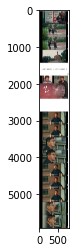

Seconds taken: 2.457


In [34]:
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_h, img_w = img.shape[:2]
img_resized = cv2.resize(img, (img_w//2, img_h//2))
print(f'input image size: {img_resized.shape[:2]}')

start = time.time()

faces = detector.detect_faces(img_resized)

for face in faces:
    print(f'model output: {face}')
    x, y, w, h = face['box']
    x1, y1 = x + w, y + h
    # confidence?
    cv2.rectangle(img, (x*2, y*2), (x1*2, y1*2), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_mtcnn_2.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
mtcnn2 = end-start

## MTCNN //4

input image size: (1479, 200)
model output: {'box': [71, 963, 39, 56], 'confidence': 0.9999920129776001, 'keypoints': {'left_eye': (97, 981), 'right_eye': (108, 980), 'nose': (111, 992), 'mouth_left': (99, 1004), 'mouth_right': (109, 1003)}}
model output: {'box': [70, 872, 36, 56], 'confidence': 0.9999719858169556, 'keypoints': {'left_eye': (94, 890), 'right_eye': (103, 889), 'nose': (109, 899), 'mouth_left': (98, 913), 'mouth_right': (106, 912)}}
model output: {'box': [66, 1304, 38, 64], 'confidence': 0.9999443292617798, 'keypoints': {'left_eye': (92, 1327), 'right_eye': (101, 1327), 'nose': (104, 1340), 'mouth_left': (92, 1353), 'mouth_right': (99, 1352)}}
model output: {'box': [75, 1395, 40, 67], 'confidence': 0.9999383687973022, 'keypoints': {'left_eye': (105, 1420), 'right_eye': (114, 1424), 'nose': (114, 1436), 'mouth_left': (98, 1446), 'mouth_right': (107, 1449)}}
model output: {'box': [103, 1143, 18, 21], 'confidence': 0.9999305009841919, 'keypoints': {'left_eye': (107, 1150), 

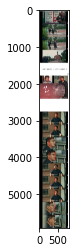

Seconds taken: 1.307


In [35]:
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_h, img_w = img.shape[:2]
img_resized = cv2.resize(img, (img_w//4, img_h//4))
print(f'input image size: {img_resized.shape[:2]}')

start = time.time()

faces = detector.detect_faces(img_resized)

for face in faces:
    print(f'model output: {face}')
    x, y, w, h = face['box']
    x1, y1 = x + w, y + h
    # confidence?
    cv2.rectangle(img, (x*4, y*4), (x1*4, y1*4), (255, 0, 0), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_mtcnn_4.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

print(f'Seconds taken: {end-start:.3f}')
mtcnn4 = end-start

## opencv-dnn //1

https://github.com/opencv/opencv/tree/master/samples/dnn

SSD framework using ResNet-10 like architecture as a backbone

To achieve the best accuracy run the model on BGR images resized to 300x300 applying mean subtraction of values (104, 177, 123) for each blue, green and red channels correspondingly.


In [36]:
!git clone https://github.com/star-bits/opencv-dnn-face-detection-caffemodel.git

fatal: destination path 'opencv-dnn-face-detection-caffemodel' already exists and is not an empty directory.


input image size: (5917, 803)
model output: [0.         1.         0.99999964 0.5147944  0.5343248  0.61795956
 0.5498788 ]
0.99999964
model output: [0.         1.         0.999998   0.51898503 0.47472823 0.6224909
 0.49058372]
0.999998
model output: [0.         1.         0.99999654 0.51657116 0.77159375 0.61878836
 0.78819495]
0.99999654
model output: [0.         1.         0.9999964  0.52280384 0.8309936  0.62532824
 0.8460099 ]
0.9999964
model output: [0.        1.        0.999987  0.5064109 0.7126013 0.6104389 0.7285106]
0.999987
model output: [0.         1.         0.9999745  0.7205093  0.30834225 0.8204087
 0.32607958]
0.9999745
model output: [0.        1.        0.9999263 3.3849971 1.722223  3.6833646 1.7758279]
0.9999263
model output: [0.         1.         0.9998393  0.218241   0.30831468 0.3271186
 0.3276183 ]
0.9998393
model output: [0.        1.        0.9997218 3.385338  1.6739777 3.6801555 1.7250758]
0.9997218
model output: [0.         1.         0.99939525 3.0705826  1.

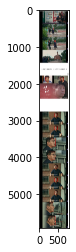

Seconds taken: 4.990


In [37]:
import cv2
import numpy as np

modelFile = "opencv-dnn-face-detection-caffemodel/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "opencv-dnn-face-detection-caffemodel/deploy.prototxt.txt" 
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

img = cv2.imread(img_file)

img_h, img_w = img.shape[:2]
print(f'input image size: {(img_h, img_w)}')

start = time.time()

blob = cv2.dnn.blobFromImage(
    img,
    scalefactor=1.0,
    # size=(300, 300), 
    size=(img_w, img_h),
    mean=(104.0, 117.0, 123.0),
)
net.setInput(blob)

faces = net.forward()
# print(faces.shape) # (1, 1, 200, 7)
for face in faces[0][0]:
    confidence = face[2]
    if confidence > 0.5:
        print(f'model output: {face}')
        print(confidence)
        bbox = face[3:]
        x0 = int(bbox[0] * img_w)
        y0 = int(bbox[1] * img_h)
        x1 = int(bbox[2] * img_w)
        y1 = int(bbox[3] * img_h)
        cv2.rectangle(img, (x0, y0), (x1, y1), (0, 0, 255), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_ssd_1.jpg', img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

print(f'Seconds taken: {end-start:.3f}')
ssd1 = end-start

## opencv-dnn //2

input image size: (2958, 401)
model output: [0.         1.         0.9998925  0.5162216  0.53438    0.61793476
 0.550101  ]
0.9998925
model output: [0.         1.         0.99983716 0.5199001  0.47454658 0.6228608
 0.49086002]
0.99983716
model output: [0.        1.        0.999731  0.329157  0.8826086 0.5189654 0.9251006]
0.999731
model output: [0.         1.         0.999632   0.34925488 0.64952767 0.5702565
 0.68762445]
0.999632
model output: [0.         1.         0.99956757 0.5091135  0.7126142  0.60623175
 0.7283529 ]
0.99956757
model output: [0.         1.         0.999476   0.51764995 0.77128536 0.6175851
 0.7887791 ]
0.999476
model output: [0.         1.         0.9989477  0.3416245  0.58719546 0.5561714
 0.627008  ]
0.9989477
model output: [0.         1.         0.9985324  0.72112    0.30802593 0.8209549
 0.32622364]
0.9985324
model output: [0.         1.         0.9981548  0.22132441 0.30827194 0.3290117
 0.32731968]
0.9981548
model output: [0.         1.         0.99763227 0

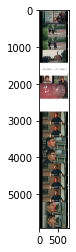

Seconds taken: 1.234


In [38]:
import cv2
import numpy as np

modelFile = "opencv-dnn-face-detection-caffemodel/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "opencv-dnn-face-detection-caffemodel/deploy.prototxt.txt" 
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

img = cv2.imread(img_file)

img_h, img_w = img.shape[:2]
print(f'input image size: {(img_h//2, img_w//2)}')

start = time.time()

blob = cv2.dnn.blobFromImage(
    img,
    scalefactor=1.0,
    # size=(300, 300), 
    size=(img_w//2, img_h//2),
    mean=(104.0, 117.0, 123.0),
)
net.setInput(blob)

faces = net.forward()
# print(faces.shape) # (1, 1, 200, 7)
for face in faces[0][0]:
    confidence = face[2]
    if confidence > 0.5:
        print(f'model output: {face}')
        print(confidence)
        bbox = face[3:]
        x0 = int(bbox[0] * img_w)
        y0 = int(bbox[1] * img_h)
        x1 = int(bbox[2] * img_w)
        y1 = int(bbox[3] * img_h)
        cv2.rectangle(img, (x0, y0), (x1, y1), (0, 0, 255), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_ssd_2.jpg', img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

print(f'Seconds taken: {end-start:.3f}')
ssd2 = end-start

## opencv-dnn //4

input image size: (1479, 200)
model output: [0.         1.         0.986227   0.5242484  0.33141983 0.8665467
 0.39596295]
0.986227
model output: [0.         1.         0.98267937 0.33440214 0.88281506 0.5146854
 0.92567855]
0.98267937
model output: [0.         1.         0.9699274  0.35844764 0.6491247  0.5726783
 0.6875786 ]
0.9699274
model output: [0.         1.         0.953459   0.21980879 0.30786622 0.32799092
 0.32735932]
0.953459
model output: [0.         1.         0.9192726  0.35394832 0.58896226 0.5422051
 0.62804705]
0.9192726
model output: [0.         1.         0.90416014 0.36476123 0.9439757  0.55222034
 0.98784006]
0.90416014
model output: [0.         1.         0.8537158  0.5157362  0.5339312  0.61470485
 0.5518872 ]
0.8537158
model output: [0.         1.         0.8406829  0.5176639  0.77091604 0.6166336
 0.7900693 ]
0.8406829
model output: [0.         1.         0.82676476 0.7258836  0.30738023 0.815799
 0.32699254]
0.82676476
model output: [0.         1.         0.7

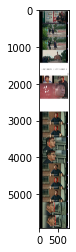

Seconds taken: 0.333


In [39]:
import cv2
import numpy as np

modelFile = "opencv-dnn-face-detection-caffemodel/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "opencv-dnn-face-detection-caffemodel/deploy.prototxt.txt" 
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

img = cv2.imread(img_file)

img_h, img_w = img.shape[:2]
print(f'input image size: {(img_h//4, img_w//4)}')

start = time.time()

blob = cv2.dnn.blobFromImage(
    img,
    scalefactor=1.0,
    # size=(300, 300),
    size=(img_w//4, img_h//4),
    mean=(104.0, 117.0, 123.0),
)
net.setInput(blob)

faces = net.forward()
# print(faces.shape) # (1, 1, 200, 7)
for face in faces[0][0]:
    confidence = face[2]
    if confidence > 0.5:
        print(f'model output: {face}')
        print(confidence)
        bbox = face[3:]
        x0 = int(bbox[0] * img_w)
        y0 = int(bbox[1] * img_h)
        x1 = int(bbox[2] * img_w)
        y1 = int(bbox[3] * img_h)
        cv2.rectangle(img, (x0, y0), (x1, y1), (0, 0, 255), 2)

end = time.time()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_ssd_4.jpg', img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

print(f'Seconds taken: {end-start:.3f}')
ssd4 = end-start

In [40]:
dir(cv2.dnn)

# 'readNetFromCaffe',
# 'readNetFromDarknet',
# 'readNetFromModelOptimizer',
# 'readNetFromONNX',
# 'readNetFromTensorflow',
# 'readNetFromTorch',
# 'readTensorFromONNX',
# 'readTorchBlob',

['DNN_BACKEND_DEFAULT',
 'DNN_BACKEND_HALIDE',
 'DNN_BACKEND_INFERENCE_ENGINE',
 'DNN_BACKEND_OPENCV',
 'DNN_BACKEND_VKCOM',
 'DNN_TARGET_CPU',
 'DNN_TARGET_FPGA',
 'DNN_TARGET_MYRIAD',
 'DNN_TARGET_OPENCL',
 'DNN_TARGET_OPENCL_FP16',
 'DNN_TARGET_VULKAN',
 'NMSBoxes',
 'NMSBoxesRotated',
 'Net_readFromModelOptimizer',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blobFromImage',
 'blobFromImages',
 'imagesFromBlob',
 'readNet',
 'readNetFromCaffe',
 'readNetFromDarknet',
 'readNetFromModelOptimizer',
 'readNetFromONNX',
 'readNetFromTensorflow',
 'readNetFromTorch',
 'readTensorFromONNX',
 'readTorchBlob',
 'shrinkCaffeModel',
 'writeTextGraph']

In [41]:
import pandas as pd
import seaborn as sns

In [42]:
df = {'img size divided by a factor of': ['1', '2', '4'],
      'haar': [haar1, haar2, haar4],
      'dlib': [dlib1, dlib2, dlib4],
      'mtcnn': [mtcnn1, mtcnn2, mtcnn4],
      'ssd': [ssd1, ssd2, ssd4]}

df = pd.DataFrame(df)
df.index = df['img size divided by a factor of']
del df['img size divided by a factor of']
df

,haar,dlib,mtcnn,ssd
img size divided by a factor of,,,,
1,3.484131,4.398214,9.122344,4.990346
2,1.071513,1.513113,2.457499,1.233554
4,0.263606,0.290368,1.306603,0.333135


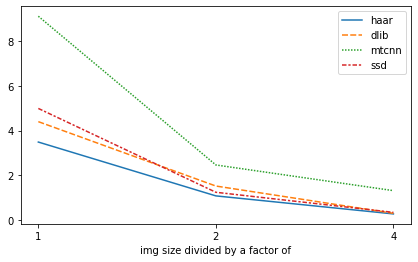

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.lineplot(data=df, ax=ax)

plt.show()